In [1]:
import sys
import os
import numpy as np
sys.path.insert(0, r'D:\uni\Masterarbeit\Code\auswertung')
import auswertung_ma
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import special
from auswertung_ma import f_exp, f_poly, f_poly_long

# Auswertung 5 Knoten

In [2]:
p5 = r'D:\Uni\Masterarbeit\Daten\Anteil\Anteil_5_nodes_2_scenarios'
p20 = r'D:\Uni\Masterarbeit\Daten\Anteil\Anteil_20_nodes_2_scenarios'

In [4]:
o5 = auswertung_ma.Read_HO(p5, 'c', 1)

Lese die Daten ein...
fertig!


In [3]:
o20 = auswertung_ma.Read_HO(p20, 'c', 1)

Lese die Daten ein...
fertig!


In [4]:
o.id_values

[2.0, 2.1, 2.5, 3.0, 4.0, 5.0]

Text(0.5, 1.0, '2 Szenarien, RTC(0,10)')

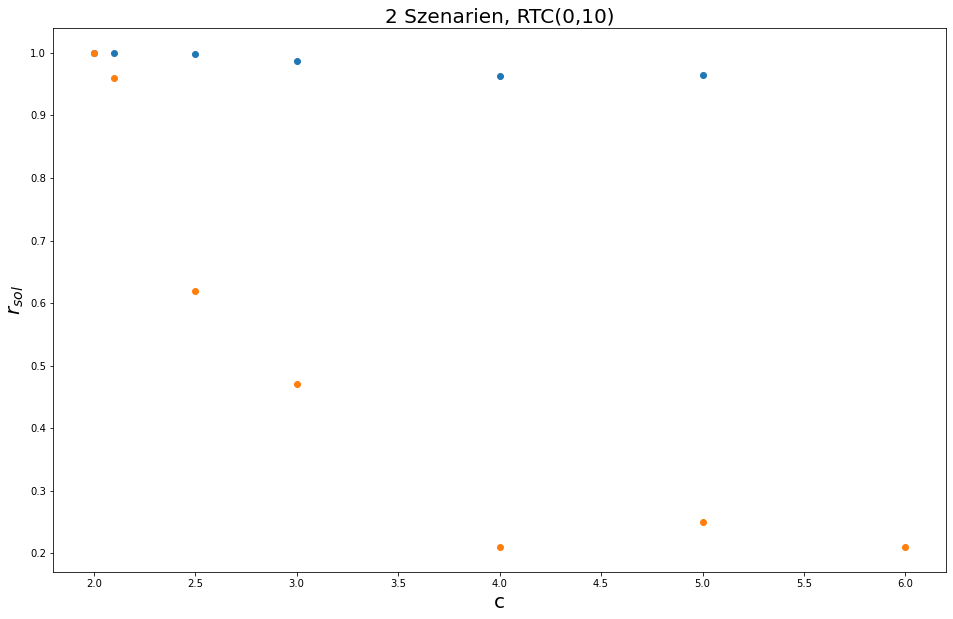

In [16]:
fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(o5.id_values, o5.anteil_ganz_geloest, label='N=5')
ax.scatter(o20.id_values, o20.anteil_ganz_geloest, label='N=20')

ax.set_xlabel('c', fontsize=20)
ax.set_ylabel('$r_{sol}$', fontsize=20)
ax.set_title('2 Szenarien, RTC(0,10)', fontsize=20)

Das ist der Antei der Problemstellungen, wo der LP-Teil bereits alles ganzzahlig loest

Text(0.5, 1.0, '2 Szenarien, RTC(0,10)')

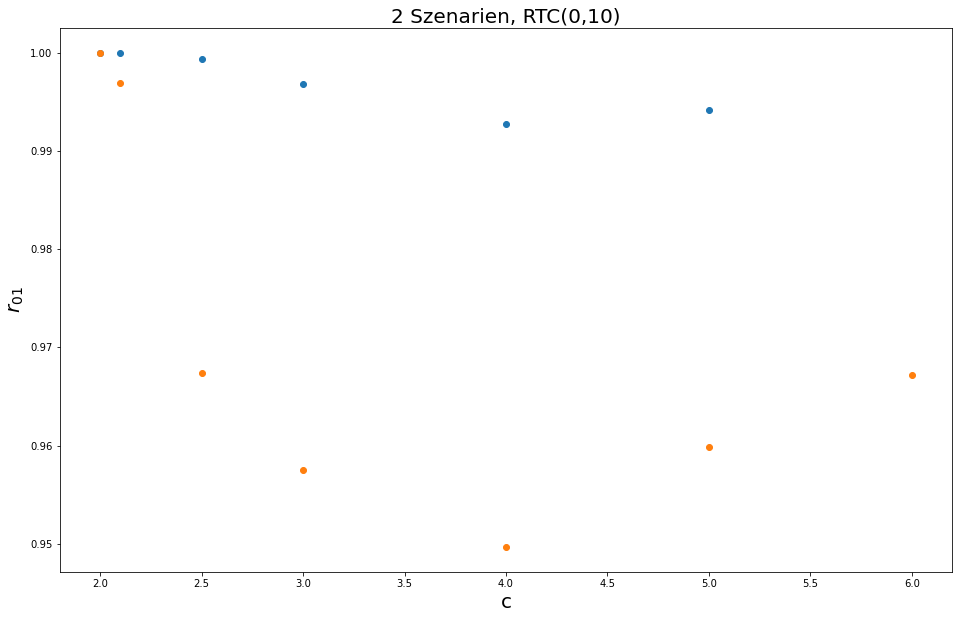

In [5]:
fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(o5.id_values, o5.mean_anteil_lp_ganz, label='N=5')
ax.scatter(o20.id_values, o20.mean_anteil_lp_ganz, label='N=20')

ax.set_xlabel('c', fontsize=20)
ax.set_ylabel('$r_{01}$', fontsize=20)
ax.set_title('2 Szenarien, RTC(0,10)', fontsize=20)

Das ganze fuer 5 szenarien:

In [7]:
p5_5 = r'D:\Uni\Masterarbeit\Daten\Anteil\Anteil_5_nodes_5_scenarios'
p6_5 = r'D:\Uni\Masterarbeit\Daten\Anteil\Anteil_6_nodes_5_scenarios'
p20_5 = r'D:\Uni\Masterarbeit\Daten\Anteil\Anteil_20_nodes_5_scenarios'
p320_5 = r'D:\Uni\Masterarbeit\Daten\Anteil\Anteil_320_nodes_5_scenarios'

In [12]:
o5_5 = auswertung_ma.Read_HO(p5_5, 'c', 1)
o6_5 = auswertung_ma.Read_HO(p6_5, 'c', 1)
o20_5 = auswertung_ma.Read_HO(p20_5, 'c', 1)
o320_5 = auswertung_ma.Read_HO(p320_5, 'c', 1)

Lese die Daten ein...
fertig!
Lese die Daten ein...
fertig!
Lese die Daten ein...
fertig!
Lese die Daten ein...
fertig!


[1.0, 0.69, 0.34, 0.19, 0.1, 0.03, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


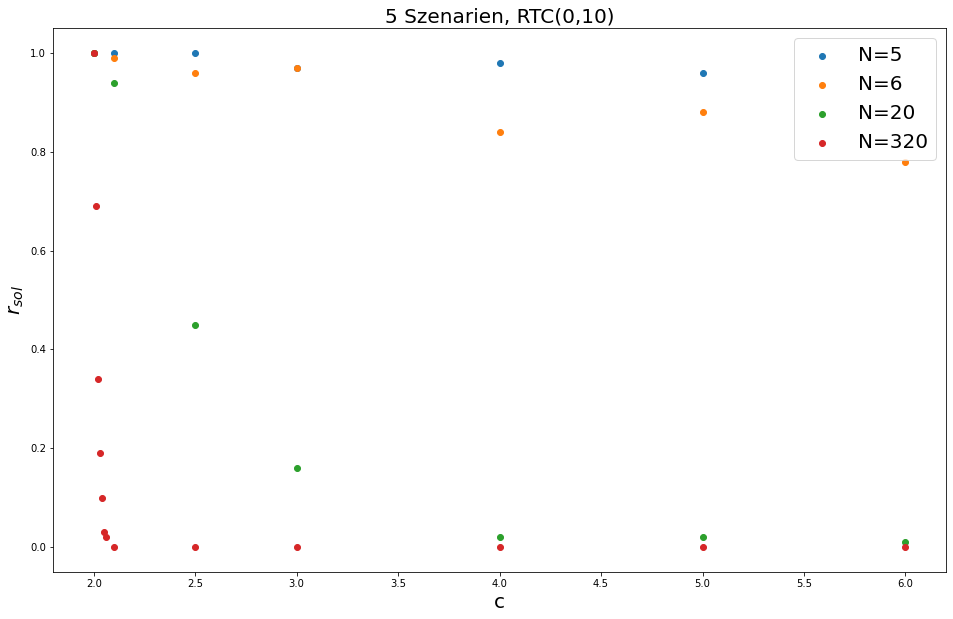

In [13]:
fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(o5_5.id_values, o5_5.anteil_ganz_geloest, label='N=5')
ax.scatter(o6_5.id_values, o6_5.anteil_ganz_geloest, label='N=6')
ax.scatter(o20_5.id_values, o20_5.anteil_ganz_geloest, label='N=20')
ax.scatter(o320_5.id_values, o320_5.anteil_ganz_geloest, label='N=320')
print(o320_5.anteil_ganz_geloest)
ax.set_xlabel('c', fontsize=20)
ax.set_ylabel('$r_{sol}$', fontsize=20)
ax.set_title('5 Szenarien, RTC(0,10)', fontsize=20)
ax.legend(fontsize=20)

Das springt fuer grosse Problemstellungen sehr schnell auf 0%. Ich denke mir, dass wenn ich ganz kleine c habe, dann habe ich ja noch eine Wahrscheinlichkeit, dass nach dem Tree keine Kanten extra hinzugefuegt werden. Wenn das passiert, dann loest der LP-Teil exakt, aber das ist dann ja kein Phasenuebergang, sondern einfach Zufall. Ich sollte das aber trotzdem anschauen, um das ausschliessen zu koennen.

Text(0.5, 1.0, '5 Szenarien, RTC(0,10)')

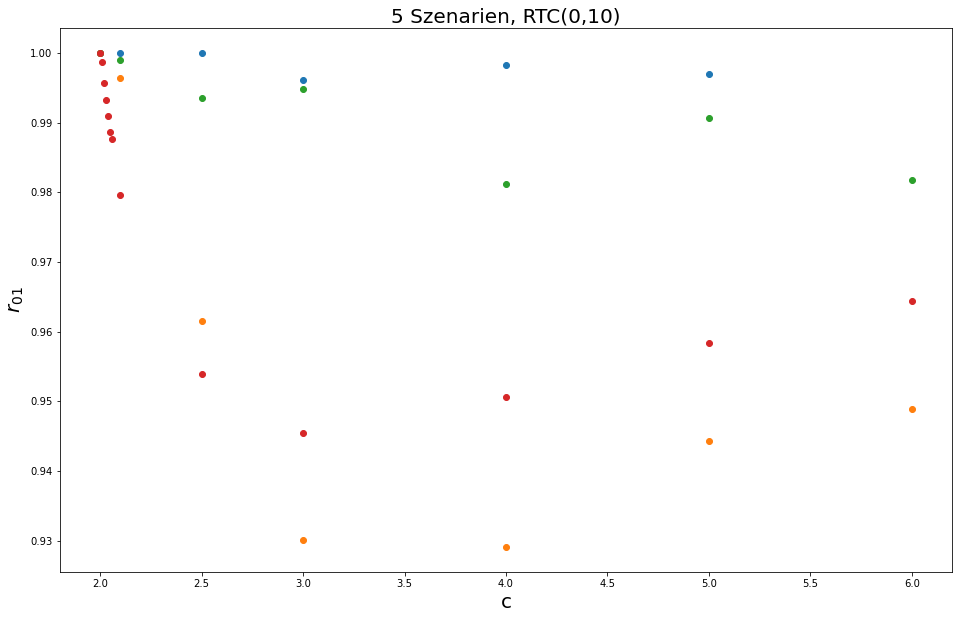

In [14]:
fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(o5_5.id_values, o5_5.mean_anteil_lp_ganz, label='N=5')
ax.scatter(o20_5.id_values, o20_5.mean_anteil_lp_ganz, label='N=20')
ax.scatter(o6_5.id_values, o6_5.mean_anteil_lp_ganz, label='N=6')
ax.scatter(o320_5.id_values, o320_5.mean_anteil_lp_ganz, label='N=320')
ax.set_xlabel('c', fontsize=20)
ax.set_ylabel('$r_{01}$', fontsize=20)
ax.set_title('5 Szenarien, RTC(0,10)', fontsize=20)
ax.legend()

In [6]:
o20_5.dfs[2]

,approx_teil[s],lp_constraint_counter,lp_teil_loop[s],lp_teil_setup[ms],anteil_lp_int,total_lp[s]
0,0.0,1,0.008254,24.5240,1.0,0.038930
1,0.0,1,0.001783,19.6646,1.0,0.021634
2,0.0,1,0.001793,20.5660,1.0,0.022553
3,0.0,1,0.001728,19.9665,1.0,0.021878
4,0.0,1,0.001885,14.1597,1.0,0.016239
...,...,...,...,...,...,...
95,0.0,1,0.001539,11.8774,1.0,0.013623
96,0.0,1,0.001625,11.8820,1.0,0.013718
97,0.0,1,0.001821,11.6221,1.0,0.013645
98,0.0,1,0.001469,11.9395,1.0,0.013613


# Überprüfen, ob für kleine c der Anteil an ganzen Lösungen nur mit der Anzahl an zu erwartenden Trees übereinstimmt

In [18]:
# berechnet, wie wahrscheinlich es ist, dass genau k Kanten bei geg. c zum Tree noch hinzugefuegt werden

def f(c, n, k):
    p = auswertung_ma.calc_p_to_c(n, c)
    return special.comb((n**2-3*n+2)/2, k) * (1-p) ** (((n**2-3*n+2)/2) - k) * p ** k

In [29]:
cs = o320_5.id_values[:7]
print(cs)
ev_anteile_tree = [f(c, 320, 0) for c in cs]

[2.0, 2.01, 2.02, 2.03, 2.04, 2.05, 2.06]


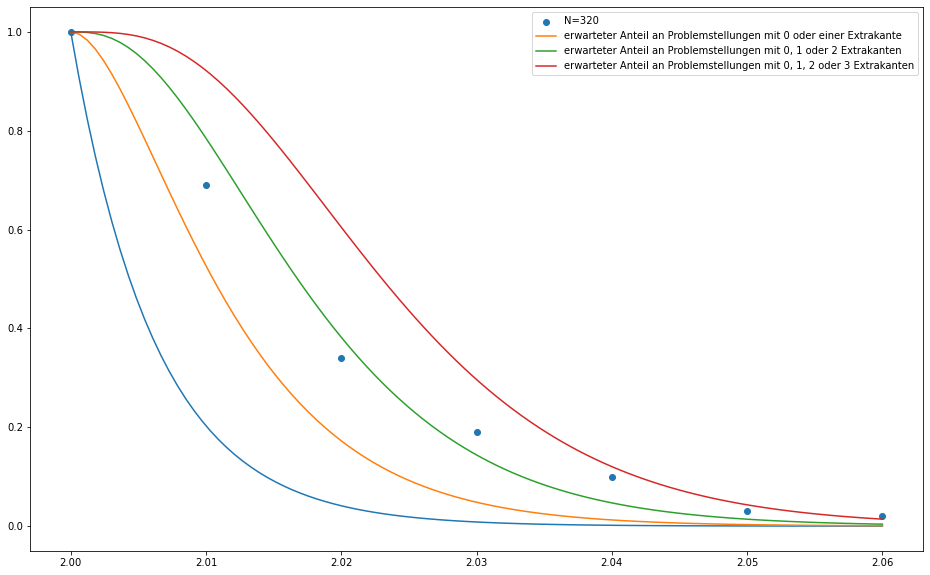

In [39]:
fig, ax =plt.subplots(figsize=(16,10))
ax.scatter(o320_5.id_values[:7], o320_5.anteil_ganz_geloest[:7], label='N=320')
# ax.scatter(cs, ev_anteile_tree, label='EV Tree Anteil')

cs_l = np.linspace(2, 2.06, 100)

anteil0 = np.array([f(c, 320, 0) for c in cs_l])
anteil1 = np.array([f(c, 320, 1) for c in cs_l])
anteil2 = np.array([f(c, 320, 2) for c in cs_l])
anteil3 = np.array([f(c, 320, 3) for c in cs_l])
ax.plot(cs_l, anteil0)
ax.plot(cs_l, anteil0+anteil1, label='erwarteter Anteil an Problemstellungen mit 0 oder einer Extrakante')
ax.plot(cs_l, anteil0+anteil1+anteil2, label='erwarteter Anteil an Problemstellungen mit 0, 1 oder 2 Extrakanten')
ax.plot(cs_l, anteil0+anteil1+anteil2+anteil3, label='erwarteter Anteil an Problemstellungen mit 0, 1, 2 oder 3 Extrakanten')
ax.legend()

Der LP-Teil schaffte es sobald 3 Extrakanten zu den 319 vom Tree dazukommen nicht mehr alle diese Problemstellungen ganz zu loesen. 

# Schaue mir die performance von Algs an

In [2]:
pk = r"D:\Uni\Masterarbeit\Daten\Anteil\Anteil_320_nodes_5_scenarios\TreePlusC_2.010000_c_320_nodes_5_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000"

In [14]:
d = auswertung_ma.read_results(pk)
(d[d['LP_Schranke'] <= d['Schranke4b']]).size

0

In [4]:
ho = r'D:\Uni\Masterarbeit\Daten\Anteil\Anteil_320_nodes_5_scenarios'

In [5]:
os.listdir(ho)

['TreePlusC_2.000000_c_320_nodes_5_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000',
 'TreePlusC_2.010000_c_320_nodes_5_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000',
 'TreePlusC_2.020000_c_320_nodes_5_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000',
 'TreePlusC_2.030000_c_320_nodes_5_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000',
 'TreePlusC_2.040000_c_320_nodes_5_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000',
 'TreePlusC_2.050000_c_320_nodes_5_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000',
 'TreePlusC_2.060000_c_320_nodes_5_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000',
 'TreePlusC_2.100000_c_320_nodes_5_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000',
 'TreePlusC_2.500000_c_320_nodes_5_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000',
 'TreePlusC_3.000000_c_320_nodes_5_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000',
 'TreePlusC_4.000000_c_320_nodes_5_Rando

In [19]:
def calc_lp_teil_performance(ho):
    tups = [(float(f.split('_')[1]), f) for f in os.listdir(ho)]
    
    ids = []
    lp_performance = []
    
    for i, konfig_ordner in tups:
        
        try:
        
            df = auswertung_ma.read_results(os.path.join(ho, konfig_ordner))
            df['diff_lp-schranke4b'] = df['LP_Schranke'] - df['Schranke4b']

            # checke, ob es vorkommt, dass eine Schranke4b groesser ist als die LP-Schranke
            if df[df['diff_lp-schranke4b'] < 0].size > 0:
                raise Exception ('ROBERTERKENNTNIS: Es gibt einen Fall, wo der LP-Teil-Wert kleiner ist als Schranke4b! Finde raus, was das heisst!')

            ids.append(i)
            lp_performance.append(df.mean()['diff_lp-schranke4b'])
        
        except KeyError as e:
            print(f'Warnung: fuer {i} gibt es keinen Alg {e.args}')
    return ids, lp_performance

In [20]:
ids, lpp = calc_lp_teil_performance(ho)

Warnung: fuer 2.0 gibt es keinen Alg ('Schranke4b',)
Warnung: fuer 2.1 gibt es keinen Alg ('Schranke4b',)
Warnung: fuer 2.5 gibt es keinen Alg ('Schranke4b',)
Warnung: fuer 3.0 gibt es keinen Alg ('Schranke4b',)
Warnung: fuer 4.0 gibt es keinen Alg ('Schranke4b',)
Warnung: fuer 5.0 gibt es keinen Alg ('Schranke4b',)
Warnung: fuer 6.0 gibt es keinen Alg ('Schranke4b',)


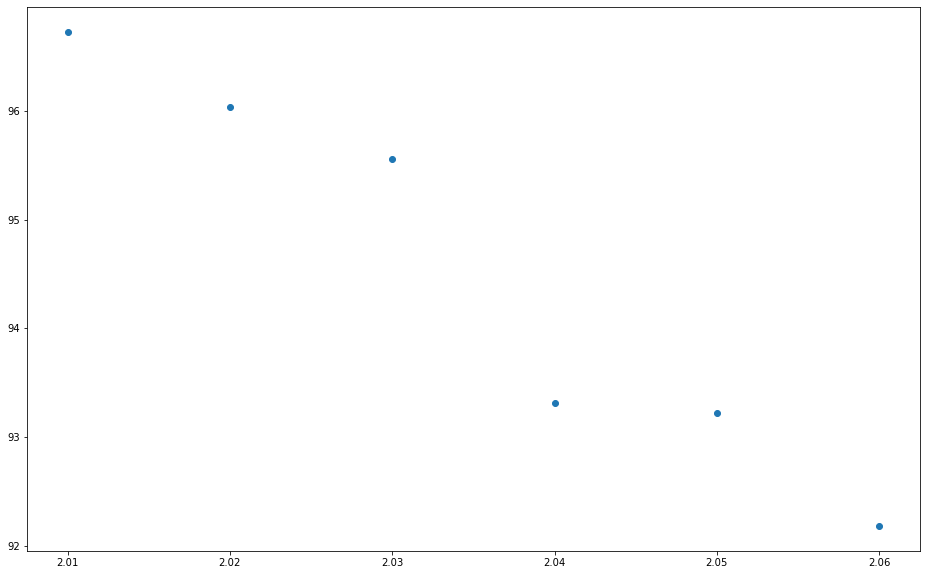

In [21]:
fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(ids, lpp)

je größer c wird, desto kleiner wird der mittlere Abstand zwischen der lp-Schranke und der Schranke4b

Will mal so einen plot sehen

In [58]:
def fu(ho, id_index):
    
    # lese die Ergebnisse aller simulationen ein
    dfs = [auswertung_ma.read_results(os.path.join(ho, k)) for k in os.listdir(ho)]

    ids = [float(k.split('_')[id_index]) for k in os.listdir(ho)]

#     return dfs[0]
    m_dic = {}
    for i, df in enumerate(dfs):
        for alg in df.columns:
            if alg in m_dic:
                # kann es zu Algorithmen verschieden viele Simulationen bei verschiedenen c geben?
                # ja, (zB wenn der opt-Alg nur fuer die ersten paar c laeuft)
                m_dic[alg]['ids'].append(ids[i])
                m_dic[alg]['ms'].append(df.mean()[alg])
#                 m_dic[alg]['stds'].append(stds[i][alg])
            else:
                print(i, alg)
                m_dic.update({alg: {'ids':[ids[i]], 'ms':[df.mean()[alg]]}})
    
    return m_dic

In [59]:
m = fu(ho, 1)

0 LP_Approx
0 Greedy
0 LP_Schranke
1 Schranke4b


In [1]:
fig, ax = plt.subplots(figsize=(16,10))

for alg in m:
    ax.scatter(m[alg]['ids'], m[alg]['ms'], label=alg)
ax.legend()
# ax.set_title("13 Knoten, 10 Szenarien mit $w \in [0,10]$", fontsize=15)
# ax.set_xlabel("Wahrscheinlichkeit p eine Kante zu einem Baum hinzuzufügen")
ax.set_ylabel("im Mittel erzielter Erwartungswert")

NameError: name 'plt' is not defined